Minimum loss: 126.7450180053711
Final loss: 126.76425170898438


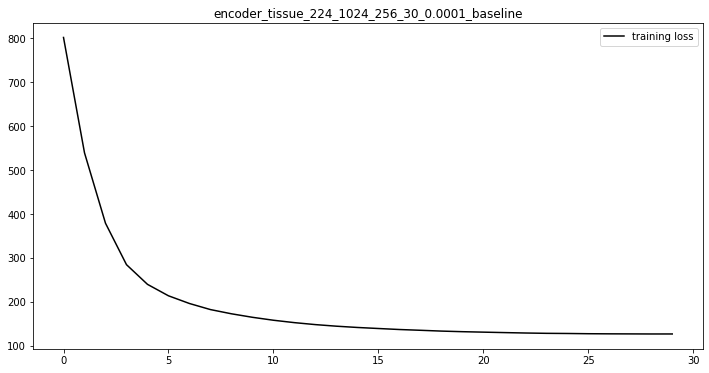

In [3]:
import matplotlib.pyplot as plt
import pickle
import os

# ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
ENCODER_DIR = 'trained_models/encoders/0714/encoder_tissue_224_1024_256_30_0.0001_baseline'
with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(12, 6))
plt.title(os.path.split(ENCODER_DIR)[-1])

plt.plot(history['loss'], label='training loss', c='k')
plt.legend()

# plt.gca().set_yscale('log')
plt.show()

In [48]:
!python evaluate_classifier.py -d "trained_models/classifiers/barlow_no_aug_0.1"

Figure(1000x600)
At early stop epoch,
	loss: 2.12264
	acc: 0.81763
	top_2_accuracy: 0.95459
	MCC: 0.66177
	val_loss: 2.12953
	val_acc: 0.81657
	val_top_2_accuracy: 0.95231
	val_MCC: 0.66171

Calculating statistics...
Found 9910 validated image filenames belonging to 4 classes.
minor: ['junk' 'tils'] Found 1757 validated image filenames belonging to 4 classes.
major: ['stroma' 'tumor'] Found 8153 validated image filenames belonging to 4 classes.

all:
78/78 [==============================] - 27s 352ms/step - loss: 2.3691 - acc: 0.7038 - top_2_accuracy: 0.9018 - MCC: 0.5300
minor:
14/14 [==============================] - 5s 370ms/step - loss: 3.5132 - acc: 0.1867 - top_2_accuracy: 0.5663 - MCC: 0.1433
major:
64/64 [==============================] - 23s 364ms/step - loss: 2.1225 - acc: 0.8153 - top_2_accuracy: 0.9741 - MCC: 0.6399

generating confusion matrix...
100%|███████████████████████████████████████████████████████████████████████████████████| 78/78 [00:41<00:00,  1.90it/s]
Figure(